# Image Recognition with Keras

## Design

### View Image Data

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# List of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

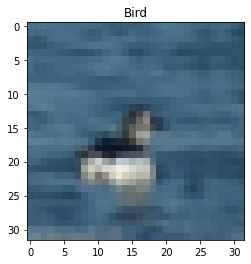

In [3]:
# Load the entire data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Loop through each picture in the data set
for i in range(1000):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class id
    image_class_number = y_train[i][0]
    # Look up the class name from the class id
    image_class_name = cifar10_class_names[image_class_number]
    
    if i==47:
        # Draw the image as a plot
        plt.imshow(sample_image)
        # Label the image
        plt.title(image_class_name)
        # Show the plot on the screen
        plt.show()

### Load Image Dataset

In [4]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

In [5]:
# Load data set
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [6]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype("float32")
x_test = x_train.astype("float32")
x_train = x_train/255
x_test = x_test/255

In [7]:
# Convert class vectors to binary class matrices
# Our labels are single values from 0 to 9.
# Instead, we want each label to be an array with on element set to 1 and and the rest set to 0.
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_train, 10)

### Dense Layers

In [8]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

In [9]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
# Convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [12]:
# Create a model and add layers
model = Sequential()
model.add(Dense(523, activation="relu", input_shape=(32,32,3)))
model.add(Dense(10,  activation="softmax"))

In [13]:
# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 523)       2092      
                                                                 
 dense_1 (Dense)             (None, 32, 32, 10)        5240      
                                                                 
Total params: 7,332
Trainable params: 7,332
Non-trainable params: 0
_________________________________________________________________


### Convolutional Layers

In [14]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

In [15]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [17]:
# Convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [18]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", activation = "relu", input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3,3), activation = "relu"))
model.add(Conv2D(64, (3,3), padding="same", activation = "relu"))
model.add(Conv2D(64, (3,3), activation = "relu"))

model.add(Flatten())

model.add(Dense(512, activation="relu", input_shape=(32, 32, 3)))
model.add(Dense(10, activation="softmax"))

In [19]:
# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               25690624  
                                                                 
 dense_3 (Dense)             (None, 10)               

### Max Pooling

In [20]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

In [21]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [23]:
# Convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [24]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [25]:
# Print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

### Dropout

In [26]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path

In [27]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [28]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [29]:
# Convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [30]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [31]:
# Print a summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

### Compile the Model

In [32]:
# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

## Building and Training

In [35]:
# Train the model
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True
)

Epoch 1/30
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4974 - accuracy: 0.4552 - val_loss: 1.1307 - val_accuracy: 0.5986
Epoch 2/30
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0985 - accuracy: 0.6098 - val_loss: 0.9371 - val_accuracy: 0.6749
Epoch 3/30
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9507 - accuracy: 0.6650 - val_loss: 0.8515 - val_accuracy: 0.6996
Epoch 4/30
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8501 - accuracy: 0.7005 - val_loss: 0.7800 - val_accuracy: 0.7265
Epoch 5/30
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7922 - accuracy: 0.7235 - val_loss: 0.7679 - val_accuracy: 0.7335
Epoch 6/30
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7441 - accuracy: 0.7404 - val_loss: 0.7053 - val_accuracy: 0.7548
Epoch 7/30
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7015 - accuracy: 0.7559 - val_loss: 0.6807 -

In [36]:
# Savve Neural Network Structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

4397

In [38]:
# Save Neural Network trained weights
model.save_weights("model_weights.h5")

### Making Predictions

In [39]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [40]:
# These are the CIFAR10 class labels from the training data (in order from 0 to 9)
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [41]:
# Load the json file that contains the model's structure
f = Path("model_structure.json")
model_structure = f.read_text()

In [42]:
# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

In [43]:
# Re-load the model's trained weights
model.load_weights("model_weights.h5")

In [46]:
# Load an image file to test, resizing it to 32x32 pixels (as required by this model)
img = image.load_img("./04/cat.png", target_size=(32,32))

In [47]:
# Convert the image to a numpy array
image_to_test = image.img_to_array(img) / 255

In [48]:
# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

In [49]:
# Make a prediction using the model
results = model.predict(list_of_images)

In [50]:
# Since we are only testing one image, we only need to check the first result
single_result = results[0]

In [51]:
# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

In [52]:
# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]

In [55]:
# Print the result
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a Cat - Likelihood: 0.943206


## Fine-tuning Pre-trained Neural Networks

### VGG16

In [56]:
import numpy as np
from keras.preprocessing import image
from keras.applications import vgg16

In [57]:
# Load Keras' VGG16 model that was pre-trained against the ImageNet database
model = vgg16.VGG16()

553476096/553467096 [==============================] - 7s 0us/step


In [58]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img("./05/bay.jpg", target_size=(224, 224))

In [59]:
# Convert the image to a numpy array
x = image.img_to_array(img)

In [60]:
# Add a fourth dimension (since Keras expects a list of images)
x = np.expand_dims(x, axis=0)

In [61]:
# Normalize the input image's pixel values to the range used when training the neural network
x = vgg16.preprocess_input(x)

In [62]:
# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)

In [63]:
# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = vgg16.decode_predictions(predictions, top=9)

In [64]:
print("Top predictions for this image:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print("Prediction: {} - {:2f}".format(name, likelihood))

Top predictions for this image:
Prediction: seashore - 0.395213
Prediction: promontory - 0.326129
Prediction: lakeside - 0.119613
Prediction: breakwater - 0.062801
Prediction: sandbar - 0.045267
Prediction: cliff - 0.011845
Prediction: dock - 0.009196
Prediction: boathouse - 0.003278
Prediction: valley - 0.003194


#### Feature Extraction

In [65]:
from pathlib import Path
import numpy as np
import joblib
from keras.preprocessing import image
from keras.applications import vgg16

In [69]:
# Path to folders with training data
dog_path = Path("./05/training_data") / "dogs"
not_dog_path = Path("./05/training_data") / "not_dogs"

images = []
labels = []
print(not_dog_path)

05\training_data\not_dogs


In [70]:
# Load all the not-dog images
for img in not_dog_path.glob("*.png"):
    # Load the image from disk
    img = image.load_img(img)

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'not dog' image, the expected value should be 0
    labels.append(0)

In [71]:
# Load all the dog images
for img in dog_path.glob("*.png"):
    # Load the image from disk
    img = image.load_img(img)

    # Convert the image to a numpy array
    image_array = image.img_to_array(img)

    # Add the image to the list of images
    images.append(image_array)

    # For each 'dog' image, the expected value should be 1
    labels.append(1)

In [72]:
# Create a single numpy array with all the images we loaded
x_train = np.array(images)

In [73]:
# Also convert the labels to a numpy array
y_train = np.array(labels)

In [74]:
# Normalize image data to 0-to-1 range
x_train = vgg16.preprocess_input(x_train)

In [75]:
# Load a pre-trained neural network to use as a feature extractor
pretrained_nn = vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [76]:
# Extract features for each image (all in one pass)
features_x = pretrained_nn.predict(x_train)

In [77]:
# Save the array of extracted features to a file
joblib.dump(features_x, "x_train.dat")

['x_train.dat']

In [78]:
# Save the matching array of expected values to a file
joblib.dump(y_train, "y_train.dat")

['y_train.dat']

### Training with extracted features

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import joblib

In [85]:
# Load data set
x_train = joblib.load("x_train.dat")
y_train = joblib.load("y_train.dat")

In [86]:
# Create a model and add layers
model = Sequential()

model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [87]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [88]:
# Train the model
model.fit(
    x_train,
    y_train,
    epochs=10,
    shuffle=True
)

Epoch 1/10
2/2 [==============================] - 0s 4ms/step - loss: 12.0044 - accuracy: 0.6379
Epoch 2/10
2/2 [==============================] - 0s 4ms/step - loss: 3.9970 - accuracy: 0.8448
Epoch 3/10
2/2 [==============================] - 0s 3ms/step - loss: 0.3389 - accuracy: 0.9655
Epoch 4/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.9655
Epoch 5/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6346 - accuracy: 0.9655
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.9655
Epoch 7/10
2/2 [==============================] - 0s 4ms/step - loss: 0.0221 - accuracy: 0.9828
Epoch 8/10
2/2 [==============================] - 0s 3ms/step - loss: 0.7288 - accuracy: 0.9828
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 0.0501 - accuracy: 0.9828
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 2.2920e-12 - accuracy: 1.0000


In [89]:
# Save neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

1459

In [90]:
# Save neural network's trained weights
model.save_weights("model_weights.h5")

### Making Predictions with Extracted Features

In [91]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np
from keras.applications import vgg16

In [92]:
# Load the json file that contains the model's structure
f = Path("model_structure.json")
model_structure = f.read_text()

In [93]:
# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

In [94]:
# Re-load the model's trained weights
model.load_weights("model_weights.h5")

In [96]:
# Load an image file to test, resizing it to 64x64 pixels (as required by this model)
img = image.load_img("./05/dog.png", target_size=(64, 64))

In [97]:
# Convert the image to a numpy array
image_array = image.img_to_array(img)

In [98]:
# Add a forth dimension to the image (since Keras expects a bunch of images, not a single image)
images = np.expand_dims(image_array, axis=0)

In [99]:
# Normalize the data
images = vgg16.preprocess_input(images)

In [100]:
# Use the pre-trained neural network to extract features from our test image (the same way we did to train the model)
feature_extraction_model = vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(64,64,3))
features = feature_extraction_model.predict(images)

In [101]:
# Given the extracted features, make a final prediction using our own model
results = model.predict(features)

In [102]:
# Since we are only testing one image with possible class, we only need to check the first result's first element
single_result = results[0][0]

In [103]:
# Print the result
print("Likelihood that this image contains a dog: {}%".format(int(single_result * 100)))

Likelihood that this image contains a dog: 100%
